In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [96]:
train = pd.read_csv(r"C:\Users\Doust\NoteBook\titanic_servive_prediction\data\train.csv")
validation = pd.read_csv(r"C:\Users\Doust\NoteBook\titanic_servive_prediction\data\test.csv")
data = pd.concat([train,validation],ignore_index=True)
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Mv manage

In [97]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<p dir="rtl" align="right">
نکته : با اینکه تعداد میسینگ های کابین بسیار زیاد هستند ولی موقعیت سوئیت هر فرد درکشتی نقش مهمی در دسترسی به قایق نجات و سایر فاکتور های دیگر در زنده ماندن فرد دارد . بنابراین فیچر را حذف نمی کنیم.
</p>


In [98]:
# amade sazi dadeh ha va feature engineering
data['Cabin'] = data['Cabin'].fillna("U")
data['Cabin'] = data['Cabin'].astype(str).str[0]
data['Sex'] = data['Sex'].map({
    "male" : 1 ,
    "female" : 0
})

In [99]:
data.loc[data['Name'].str.contains('Mr.',case=False , na=False),"Sex"] = 1
data.loc[data['Name'].str.contains('Mrs.',case=False , na=False),"Sex"] = 0
data.loc[data['Name'].str.contains('Miss.',case=False , na=False),"Sex"] = 0
data.loc[data['Name'].str.contains('Master.',case=False , na=False),"Sex"] = 1
data.loc[data['Sex'].isna(),'Sex'] = 1
data['Sex'].astype(int)
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
dtype: int64

In [100]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [101]:
# Tanzim Age haye missing ba estefade az Esm ha
#  برای اینکه دیتا نشت پیدا نکنه
#  باید برای میانگین باید از داده های آموزشی استفاده کنیم 
# و بعد روی کل داده ها اعمال کنیم
mean_master = train.loc[data['Name'].str.contains("Master.",case=False,na=False),'Age'].mean().round(1)
mean_mr = train.loc[data['Name'].str.contains("Mr.",case=False,na=False),'Age'].mean().round(1)
mean_mrs = train.loc[data['Name'].str.contains("Mrs.",case=False,na=False),'Age'].mean().round(1)
mean_miss = train.loc[data['Name'].str.contains("Miss.",case=False,na=False),'Age'].mean().round(1)

data.loc[data['Name'].str.contains("Master.",case=False,na=False),'Age'] = mean_master
data.loc[data['Name'].str.contains("Mr.",case=False,na=False),'Age'] = mean_mr
data.loc[data['Name'].str.contains("Mrs.",case=False,na=False),'Age'] = mean_mrs
data.loc[data['Name'].str.contains("Miss.",case=False,na=False),'Age'] = mean_miss
data.loc[data['Name'].str.contains("Ms.",case=False,na=False),'Age'] = mean_miss
data.loc[data['Name'].str.contains("Dr.",case=False,na=False),'Age'] = mean_mr

In [102]:
data.loc[data['Embarked'].isna(),'Embarked'] = data['Embarked'].mode()[0]
data.loc[data['Fare'].isna(),'Fare'] = data.loc[data['Pclass'] == 3 , 'Fare'].mean()

In [103]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

(array([916.,   0.,   0.,   0.,   0., 270.,   0.,   0.,   0., 123.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

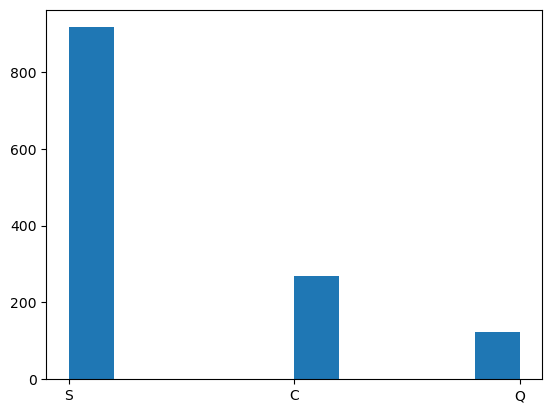

In [104]:
data['Embarked'].value_counts()
plt.hist(data['Embarked'].values)

# Data Exploration and Visualization

In [105]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,33.1,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,35.6,1,0,PC 17599,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,21.8,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.6,1,0,113803,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",1,33.1,0,0,373450,8.0500,U,S


(array([466.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 843.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

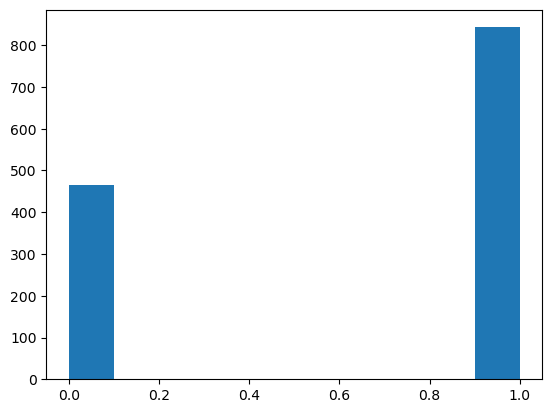

In [106]:
plt.hist(data["Sex"])

1309 Mean : 33.28    Median : 14.45


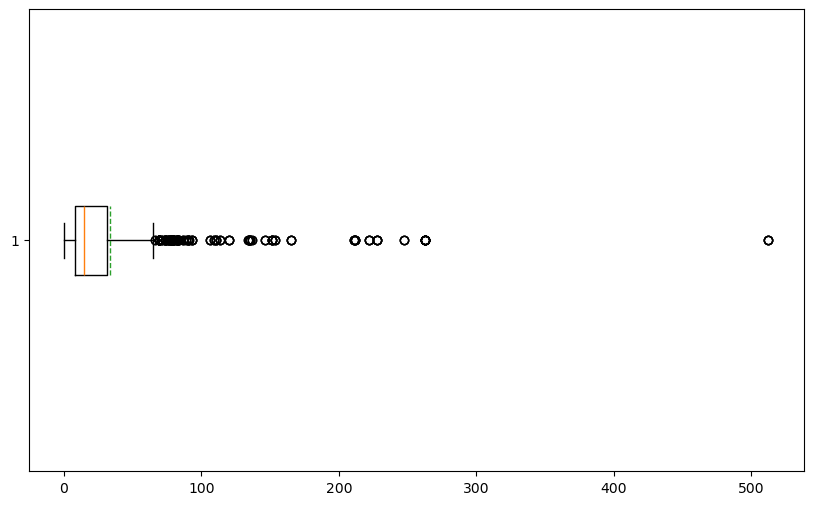

In [107]:
plt.figure(figsize=(10,6))
x = 1000
mean = data.loc[data['Fare']<=x,'Fare'].mean()
median = data.loc[data['Fare']<=x,'Fare'].median()
plt.boxplot(data.loc[data['Fare']<=x,'Fare'],vert=False,showmeans=True, meanline=True)
print(\
len(data.loc[data['Fare']<=x,'Fare']),\
f'Mean : {mean:0.2f}',f'   Median : {median:0.2f}')
# plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='Threshold')

In [108]:
data.loc[data['Fare']>=200,'Fare']

27      263.0000
88      263.0000
118     247.5208
258     512.3292
299     247.5208
311     262.3750
341     263.0000
377     211.5000
380     227.5250
438     263.0000
527     221.7792
557     227.5250
679     512.3292
689     211.3375
700     227.5250
716     227.5250
730     211.3375
737     512.3292
742     262.3750
779     211.3375
915     262.3750
944     263.0000
950     262.3750
955     262.3750
960     263.0000
965     211.5000
966     211.5000
972     221.7792
1005    221.7792
1033    262.3750
1047    221.7792
1075    247.5208
1093    227.5250
1109    211.5000
1215    211.3375
1234    512.3292
1266    262.3750
1298    211.5000
Name: Fare, dtype: float64

(array([323.,   0.,   0.,   0.,   0., 277.,   0.,   0.,   0., 709.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

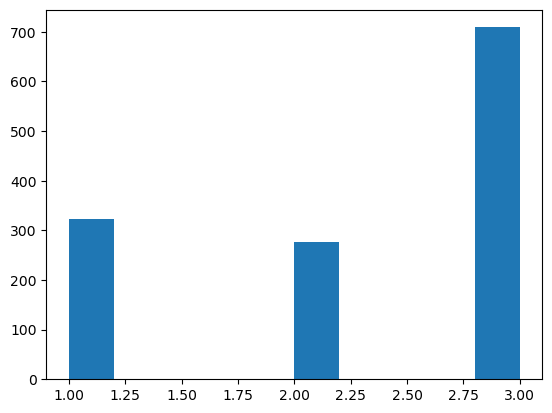

In [109]:
plt.hist(data["Pclass"])

# Encoding

In [110]:
cdata = pd.get_dummies(data , columns=['Cabin' , 'Embarked'])
# cdata = cdata[['Survived','Pclass','','','','',''
cdata = cdata.drop(['PassengerId','Name','Ticket'],axis=1)


In [111]:
cdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,1,33.1,1,0,7.2500,False,False,False,False,False,False,False,False,True,False,False,True
1,1.0,1,0,35.6,1,0,71.2833,False,False,True,False,False,False,False,False,False,True,False,False
2,1.0,3,0,21.8,0,0,7.9250,False,False,False,False,False,False,False,False,True,False,False,True
3,1.0,1,0,35.6,1,0,53.1000,False,False,True,False,False,False,False,False,False,False,False,True
4,0.0,3,1,33.1,0,0,8.0500,False,False,False,False,False,False,False,False,True,False,False,True


# Split and Scale
---

In [112]:
validation_table = cdata.loc[cdata["Survived"].isna()]
validation_table.drop(["Survived"],axis=1,inplace=True)
train_table = cdata.dropna(subset=["Survived"])
validation = np.asarray(validation_table)


X = np.asarray(train_table.drop(["Survived"],axis=1))
Y = np.asarray(train_table["Survived"])


C:\Users\Doust\AppData\Local\Temp\ipykernel_47292\449596090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_table.drop(["Survived"],axis=1,inplace=True)


In [113]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
validation = scaler.fit_transform(validation)

In [114]:
validation[0:5]

array([[ 0.87348191,  0.75592895,  0.41580897, -0.49947002, -0.4002477 ,
        -0.49735441, -0.13050529, -0.21213203, -0.30229756, -0.17916128,
        -0.14834045, -0.13968606, -0.04897021,  0.        ,  0.52752958,
        -0.56814154,  2.84375747, -1.35067551],
       [ 0.87348191, -1.32287566,  0.74536556,  0.61699237, -0.4002477 ,
        -0.51221879, -0.13050529, -0.21213203, -0.30229756, -0.17916128,
        -0.14834045, -0.13968606, -0.04897021,  0.        ,  0.52752958,
        -0.56814154, -0.35164743,  0.74037028],
       [-0.31581919,  0.75592895,  0.41580897, -0.49947002, -0.4002477 ,
        -0.46404218, -0.13050529, -0.21213203, -0.30229756, -0.17916128,
        -0.14834045, -0.13968606, -0.04897021,  0.        ,  0.52752958,
        -0.56814154,  2.84375747, -1.35067551],
       [ 0.87348191,  0.75592895,  0.41580897, -0.49947002, -0.4002477 ,
        -0.48241652, -0.13050529, -0.21213203, -0.30229756, -0.17916128,
        -0.14834045, -0.13968606, -0.04897021,  0.   

In [115]:
X[0:5]

array([[ 0.82737724,  0.73769513,  0.39790872,  0.43279337, -0.47367361,
        -0.50244517, -0.13085598, -0.23598136, -0.26629582, -0.19611614,
        -0.19300938, -0.12168146, -0.06715343, -0.03352008,  0.54492498,
        -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.72339867,  0.43279337, -0.47367361,
         0.78684529, -0.13085598, -0.23598136,  3.75522235, -0.19611614,
        -0.19300938, -0.12168146, -0.06715343, -0.03352008, -1.835115  ,
         2.0745051 , -0.30756234, -1.62380254],
       [ 0.82737724, -1.35557354, -1.07330584, -0.4745452 , -0.47367361,
        -0.48885426, -0.13085598, -0.23598136, -0.26629582, -0.19611614,
        -0.19300938, -0.12168146, -0.06715343, -0.03352008,  0.54492498,
        -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693, -1.35557354,  0.72339867,  0.43279337, -0.47367361,
         0.42073024, -0.13085598, -0.23598136,  3.75522235, -0.19611614,
        -0.19300938, -0.12168146, -0.06715343, -0.033

In [116]:
Y[0:5]

array([0., 1., 1., 1., 0.])

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.8,random_state=4)

# Modeling
---
مدل رگرسیون لجستیک و دو مدل درختی رندوم فارست و ایکس جی بوست رو تست می کنیم.

##     LogisticRegression

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01).fit(x_train,y_train)
model

LogisticRegression(C=0.01)

In [119]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,log_loss,jaccard_score
lr_yhat = model.predict(x_test)
print(f'F1 :{f1_score(y_test,lr_yhat)}\n',f'recall : {recall_score(y_test,lr_yhat)}\n',f'precision: {precision_score(y_test,lr_yhat)}\n' \
, f"log_loss : {log_loss(y_test,lr_yhat)}\n",f'jaccard :{jaccard_score(y_test,lr_yhat)}')


F1 :0.5271317829457365
 recall : 0.37362637362637363
 precision: 0.8947368421052632
 log_loss : 9.251035862844937
 jaccard :0.35789473684210527


<p dir="rtl" align="right">
مدل داده های مثبت را به خوبی تشخیص میدهد ولی در انتخاب و تخصیص داده های مثبت بسیار محتاط عمل میکنه که باعث کاهش ریکال و اف وان شده و مقدار لاس بخاطر اینکه مدل اکثر رکورد هار منفی تشخیص داده بشدت بالاست ..
</p>


In [120]:
lr_yhat[0:5]

array([0., 0., 1., 1., 0.])

In [121]:
y_test[0:5]

array([0., 0., 1., 1., 0.])

In [122]:
lr_yhat_prob = model.predict_proba(x_test)
lr_yhat_prob[0:5]

array([[0.7346807 , 0.2653193 ],
       [0.73425262, 0.26574738],
       [0.49225607, 0.50774393],
       [0.4008055 , 0.5991945 ],
       [0.6300139 , 0.3699861 ]])

In [123]:
report_lr = pd.DataFrame(classification_report(y_test,lr_yhat,output_dict=True)).transpose()
report_lr

,precision,recall,f1-score,support
0.0,0.714524,0.972727,0.823869,440.000000
1.0,0.894737,0.373626,0.527132,273.000000
accuracy,0.743338,0.743338,0.743338,0.743338
macro avg,0.804631,0.673177,0.675500,713.000000
weighted avg,0.783526,0.743338,0.710252,713.000000


## RandomForest

In [124]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_hat = rf_model.predict(x_test)

In [125]:
report_rf = pd.DataFrame(classification_report(y_test,rf_y_hat,output_dict=True)).transpose()
report_rf

,precision,recall,f1-score,support
0.0,0.817610,0.886364,0.850600,440.000000
1.0,0.788136,0.681319,0.730845,273.000000
accuracy,0.807854,0.807854,0.807854,0.807854
macro avg,0.802873,0.783841,0.790722,713.000000
weighted avg,0.806325,0.807854,0.804747,713.000000


<p dir="rtl" align="right">
با تغییر مدل به درختی recall به خوبی افزایش پیدا کرده و دقت بهتر شده
</p>


In [126]:
print(f'F1 : {f1_score(y_test, rf_y_hat)}')
print(f'Recall : {recall_score(y_test, rf_y_hat)}')
print(f'Precision : {precision_score(y_test, rf_y_hat)}')
print(f'Log_loss : {log_loss(y_test, rf_y_hat)}')
print(f'Jaccard : {jaccard_score(y_test, rf_y_hat)}')

F1 : 0.730844793713163
Recall : 0.6813186813186813
Precision : 0.788135593220339
Log_loss : 6.925638869998667
Jaccard : 0.5758513931888545


## XGBOOST

In [127]:
import xgboost 
from xgboost import plot_tree 
model_xg = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3,\
                                 random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xg.fit(x_train, y_train)
xg_yhat = model_xg.predict(x_test)
report_xg = pd.DataFrame(classification_report(y_test,xg_yhat,output_dict=True)).transpose()
report_xg

g:\anaconda3_2024\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:31:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,precision,recall,f1-score,support
0.0,0.820000,0.931818,0.872340,440.000000
1.0,0.859155,0.670330,0.753086,273.000000
accuracy,0.831697,0.831697,0.831697,0.831697
macro avg,0.839577,0.801074,0.812713,713.000000
weighted avg,0.834992,0.831697,0.826679,713.000000


In [128]:
print(f'F1 : {f1_score(y_test, xg_yhat)}')
print(f'Recall : {recall_score(y_test, xg_yhat)}')
print(f'Precision : {precision_score(y_test, xg_yhat)}')
print(f'Log_loss : {log_loss(y_test, xg_yhat)}')
print(f'Jaccard : {jaccard_score(y_test, xg_yhat)}')

F1 : 0.7530864197530864
Recall : 0.6703296703296703
Precision : 0.8591549295774648
Log_loss : 6.066253024816351
Jaccard : 0.6039603960396039


In [131]:
validation
raw_validation = pd.read_csv(r"C:\Users\Doust\NoteBook\titanic_servive_prediction\data\test.csv")
validation_ids = raw_validation["PassengerId"].copy()
xg_yhat_sub = model_xg.predict(validation)
print(len(validation),\
len(raw_validation))
raw_validation

418 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [133]:
submission = pd.DataFrame({
    "PassengerId": validation_ids,
    "Survived": xg_yhat_sub
})

submission


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
